# **Data Pre-Processing and EDA**

In [307]:
# importing libraries
import pandas as pd
import numpy as np
import functools
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score,KFold
from sklearn.decomposition import PCA,IncrementalPCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,confusion_matrix,recall_score,roc_auc_score,roc_curve,classification_report,f1_score,make_scorer
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [308]:
from google.colab import files
#uploaded = files.upload()

In [309]:
# Reading csv finals 
demograpgic = pd.read_csv('demographic.csv')
diet = pd.read_csv('diet.csv')
examination = pd.read_csv('examination.csv')
labs = pd.read_csv('labs.csv')
questionnaire = pd.read_csv('questionnaire.csv')

In [310]:
# merging all csv files based on a common columns "SEQN"
dfs = [demograpgic,diet,examination,labs, questionnaire]
df_final = functools.reduce(lambda left, right: pd.merge(left,right,on='SEQN'), dfs)

In [311]:
# filtering columns
# selecting necessary columns
df_final = df_final[['RIAGENDR','RIDAGEYR','RIDAGEMN','RIDRETH1','DMQMILIZ','DMDMARTL','RIDEXPRG','INDFMPIR','BMXWT','BMXHT','BMXBMI','BPXPLS','BPXSY2','BPXDI2','LBXTC','LBXGH','URDACT', 'LBDWFL', 'LBXIN', 'LBXTR', 'LBXGLT', 'PAQ635', 'DR1TTFAT', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TALCO']]

In [312]:
df_final.rename(columns={"RIAGENDR":"Gender","RIDAGEYR":"Age","RIDAGEMN":"Age Months","RIDRETH1":"Race","DMQMILIZ":"Veteran Status","DMDMARTL":"Marital Status","RIDEXPRG":"Pregnancy","INDFMPIR":"Ratio of Income to Poverty Guidelines","BMXWT":"Weight","BMXHT":"Height","BMXBMI":"BMI","BPXPLS":"Pulse","BPXSY2":"Systolic Pressure","BPXDI2":"Diastolic Pressure","LBXTC":"Total Cholestrol(mg/dl)","LBXGH":"Glychohemoglobin","URDACT":"Albumin Creatinine level",'LBDWFL':'Water Level', 'LBXIN': 'Insulin Level', 'LBXTR': "Triglycerides", 'LBXGLT':'Glucose', 'PAQ635':'Physical Activity', 'DR1TTFAT':'Fat Intake(gms in a day)', 'DR1TKCAL': 'Energy Intake(kcal in a day)', 'DR1TPROT':'Protein Intake(gms in a day)', 'DR1TCARB':'Carbs Intake(gms in a day)', 'DR1TALCO':'Alcohol Intake(gms in a day)'},inplace=True)

In [313]:
df_final.loc[df_final['Age'] == 0, 'Age'] = df_final.loc[df_final['Age'] == 0, 'Age Months']/12

In [314]:
df_filtered = df_final[df_final['Glychohemoglobin'].notnull()]

In [315]:
#Forming the target variable based on Glychohemoglobin levels
df_filtered.loc[df_filtered['Glychohemoglobin'] < 6.5, 'Diabetes'] = 0
df_filtered.loc[df_filtered['Glychohemoglobin'] >= 6.5, 'Diabetes'] = 1

In [316]:
df_filtered.shape

(6643, 28)

In [317]:
df_filtered.reset_index(inplace=True)
df_filtered.drop(columns='index', inplace=True)

In [318]:
df_filtered

,Gender,Age,Age Months,Race,Veteran Status,Marital Status,Pregnancy,Ratio of Income to Poverty Guidelines,Weight,Height,...,Insulin Level,Triglycerides,Glucose,Physical Activity,Fat Intake(gms in a day),Energy Intake(kcal in a day),Protein Intake(gms in a day),Carbs Intake(gms in a day),Alcohol Intake(gms in a day),Diabetes
0,1,69.0,NaN,4,1.0,4.0,NaN,0.84,78.3,171.3,...,NaN,NaN,NaN,2.0,52.81,1574.0,43.63,239.59,0.0,1.0
1,1,54.0,NaN,3,2.0,1.0,NaN,1.78,89.5,176.8,...,NaN,NaN,NaN,2.0,124.29,5062.0,338.13,423.78,119.0,1.0
2,1,72.0,NaN,3,1.0,1.0,NaN,4.51,88.9,175.3,...,5.83,51.0,NaN,2.0,65.97,1743.0,64.61,224.39,0.0,1.0
3,2,73.0,NaN,3,2.0,1.0,NaN,5.00,52.0,162.4,...,6.12,75.0,NaN,2.0,55.36,1421.0,55.24,178.20,0.0,0.0
4,1,56.0,NaN,1,1.0,3.0,NaN,4.79,105.0,158.7,...,NaN,NaN,NaN,2.0,93.92,1785.0,55.11,189.59,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6638,1,52.0,NaN,3,2.0,1.0,NaN,5.00,79.5,176.2,...,NaN,NaN,NaN,2.0,17.97,1225.0,35.05,250.82,0.0,0.0
6639,1,61.0,NaN,1,2.0,1.0,NaN,3.53,99.5,173.5,...,30.71,103.0,NaN,2.0,95.36,2181.0,70.52,265.54,0.0,1.0
6640,1,80.0,NaN,3,2.0,1.0,NaN,3.09,77.1,176.0,...,NaN,NaN,NaN,2.0,69.26,2432.0,77.09,384.72,0.0,0.0
6641,1,26.0,NaN,2,2.0,5.0,NaN,NaN,71.8,171.3,...,3.76,81.0,108.0,2.0,193.51,4687.0,223.32,494.54,14.0,0.0


##Data imputation of Categorical Variables

### Pregnancy and Marital Status imputation

Pregnancy Data is for females between the 20 and 44. All the other values are null. 

In [319]:
# For all the null values of pregnancy in the age group of 20 - 44, the gender is male. Hence imputing null with 2(Not pregnant)
df1 = df_filtered[df_filtered['Pregnancy'].isnull() & (df_filtered['Age']>=20) & (df_filtered['Age']<=44)]
df1.Gender.value_counts()

1    1107
Name: Gender, dtype: int64

In [320]:
# Imputing null values of pregnancy with 'Not pregnant' category values - 2
df_filtered['Pregnancy'] = df_filtered['Pregnancy'].fillna(2)

In [321]:
# For all the null values of Marital Status, the Age is <=19. Hence imputing null with 5(Never Married) 
df1 = df_filtered[df_filtered['Marital Status'].isnull()]
df1.Age.value_counts()

16.0    178
14.0    177
18.0    168
12.0    164
15.0    157
13.0    144
17.0    133
19.0    130
Name: Age, dtype: int64

In [322]:
# Imputing null values of pregnancy with 'Never Married' category values - 5
df_filtered['Marital Status'] = df_filtered['Marital Status'].fillna(5)

In [323]:
# percentage null values in columns
df_filtered.isnull().mean() * 100

Gender                                     0.000000
Age                                        0.000000
Age Months                               100.000000
Race                                       0.000000
Veteran Status                            12.343821
Marital Status                             0.000000
Pregnancy                                  0.000000
Ratio of Income to Poverty Guidelines      7.617040
Weight                                     0.948367
Height                                     1.008580
BMI                                        1.129008
Pulse                                      3.206383
Systolic Pressure                          5.012795
Diastolic Pressure                         5.012795
Total Cholestrol(mg/dl)                    1.098901
Glychohemoglobin                           0.000000
Albumin Creatinine level                   1.580611
Water Level                               81.695017
Insulin Level                             53.469818
Triglyceride

In [324]:
df_filtered = df_filtered.loc[:,df_filtered.isnull().mean() < 0.75]

In [325]:
df_filtered.isnull().mean() * 100

Gender                                    0.000000
Age                                       0.000000
Race                                      0.000000
Veteran Status                           12.343821
Marital Status                            0.000000
Pregnancy                                 0.000000
Ratio of Income to Poverty Guidelines     7.617040
Weight                                    0.948367
Height                                    1.008580
BMI                                       1.129008
Pulse                                     3.206383
Systolic Pressure                         5.012795
Diastolic Pressure                        5.012795
Total Cholestrol(mg/dl)                   1.098901
Glychohemoglobin                          0.000000
Albumin Creatinine level                  1.580611
Insulin Level                            53.469818
Triglycerides                            52.671986
Glucose                                  64.729791
Physical Activity              

In [326]:
# Imputing Veteran Status and Physical Activity with 'No' Category value - 2
df_filtered['Veteran Status'] = df_filtered['Veteran Status'].fillna(2)
df_filtered['Physical Activity'] = df_filtered['Physical Activity'].fillna(2)

In [327]:
cols = ['Race', 'Veteran Status', 'Marital Status', 'Pregnancy', 'Physical Activity', 'Diabetes']
for i in cols:
  df_filtered[i] = df_filtered[i].astype('int')
  df_filtered[i] = df_filtered[i].astype('category')

In [328]:
df_filtered['Age_between'] = pd.cut(df_filtered['Age'], bins=[0,15,25,40,60,100],labels=['0-15','16-25','26-40','41-60','61 and above'])

In [329]:
df1 = df_filtered.copy(deep=True)

In [330]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [331]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iterimp = IterativeImputer() 

In [332]:
cols = df_filtered.select_dtypes(include=np.number).columns.tolist()
for i in cols:
    df_filtered[i] = df_filtered[i].fillna(df_filtered.groupby('Age_between')[i].transform('mean'))

In [333]:
df_filtered.isnull().mean() * 100

Gender                                   0.0
Age                                      0.0
Race                                     0.0
Veteran Status                           0.0
Marital Status                           0.0
Pregnancy                                0.0
Ratio of Income to Poverty Guidelines    0.0
Weight                                   0.0
Height                                   0.0
BMI                                      0.0
Pulse                                    0.0
Systolic Pressure                        0.0
Diastolic Pressure                       0.0
Total Cholestrol(mg/dl)                  0.0
Glychohemoglobin                         0.0
Albumin Creatinine level                 0.0
Insulin Level                            0.0
Triglycerides                            0.0
Glucose                                  0.0
Physical Activity                        0.0
Fat Intake(gms in a day)                 0.0
Energy Intake(kcal in a day)             0.0
Protein In

In [334]:
df_filtered

,Gender,Age,Race,Veteran Status,Marital Status,Pregnancy,Ratio of Income to Poverty Guidelines,Weight,Height,BMI,...,Triglycerides,Glucose,Physical Activity,Fat Intake(gms in a day),Energy Intake(kcal in a day),Protein Intake(gms in a day),Carbs Intake(gms in a day),Alcohol Intake(gms in a day),Diabetes,Age_between
0,1,69.0,4,1,4,2,0.840000,78.3,171.3,26.7,...,117.587179,137.616142,2,52.81,1574.0,43.63,239.59,0.0,1,61 and above
1,1,54.0,3,2,1,2,1.780000,89.5,176.8,28.6,...,132.911504,121.980741,2,124.29,5062.0,338.13,423.78,119.0,1,41-60
2,1,72.0,3,1,1,2,4.510000,88.9,175.3,28.9,...,51.000000,137.616142,2,65.97,1743.0,64.61,224.39,0.0,1,61 and above
3,2,73.0,3,2,1,2,5.000000,52.0,162.4,19.7,...,75.000000,137.616142,2,55.36,1421.0,55.24,178.20,0.0,0,61 and above
4,1,56.0,1,1,3,2,4.790000,105.0,158.7,41.7,...,132.911504,121.980741,2,93.92,1785.0,55.11,189.59,0.0,0,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6638,1,52.0,3,2,1,2,5.000000,79.5,176.2,25.6,...,132.911504,121.980741,2,17.97,1225.0,35.05,250.82,0.0,0,41-60
6639,1,61.0,1,2,1,2,3.530000,99.5,173.5,33.1,...,103.000000,137.616142,2,95.36,2181.0,70.52,265.54,0.0,1,61 and above
6640,1,80.0,3,2,1,2,3.090000,77.1,176.0,24.9,...,117.587179,137.616142,2,69.26,2432.0,77.09,384.72,0.0,0,61 and above
6641,1,26.0,2,2,5,2,2.414801,71.8,171.3,24.5,...,81.000000,108.000000,2,193.51,4687.0,223.32,494.54,14.0,0,26-40


In [335]:
df_filtered

,Gender,Age,Race,Veteran Status,Marital Status,Pregnancy,Ratio of Income to Poverty Guidelines,Weight,Height,BMI,...,Triglycerides,Glucose,Physical Activity,Fat Intake(gms in a day),Energy Intake(kcal in a day),Protein Intake(gms in a day),Carbs Intake(gms in a day),Alcohol Intake(gms in a day),Diabetes,Age_between
0,1,69.0,4,1,4,2,0.840000,78.3,171.3,26.7,...,117.587179,137.616142,2,52.81,1574.0,43.63,239.59,0.0,1,61 and above
1,1,54.0,3,2,1,2,1.780000,89.5,176.8,28.6,...,132.911504,121.980741,2,124.29,5062.0,338.13,423.78,119.0,1,41-60
2,1,72.0,3,1,1,2,4.510000,88.9,175.3,28.9,...,51.000000,137.616142,2,65.97,1743.0,64.61,224.39,0.0,1,61 and above
3,2,73.0,3,2,1,2,5.000000,52.0,162.4,19.7,...,75.000000,137.616142,2,55.36,1421.0,55.24,178.20,0.0,0,61 and above
4,1,56.0,1,1,3,2,4.790000,105.0,158.7,41.7,...,132.911504,121.980741,2,93.92,1785.0,55.11,189.59,0.0,0,41-60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6638,1,52.0,3,2,1,2,5.000000,79.5,176.2,25.6,...,132.911504,121.980741,2,17.97,1225.0,35.05,250.82,0.0,0,41-60
6639,1,61.0,1,2,1,2,3.530000,99.5,173.5,33.1,...,103.000000,137.616142,2,95.36,2181.0,70.52,265.54,0.0,1,61 and above
6640,1,80.0,3,2,1,2,3.090000,77.1,176.0,24.9,...,117.587179,137.616142,2,69.26,2432.0,77.09,384.72,0.0,0,61 and above
6641,1,26.0,2,2,5,2,2.414801,71.8,171.3,24.5,...,81.000000,108.000000,2,193.51,4687.0,223.32,494.54,14.0,0,26-40


##Exploratory Data Analysis (EDA)

In [336]:
df_filtered['Diabetes'].value_counts()

0    6039
1     604
Name: Diabetes, dtype: int64

<Axes: title={'center': 'Diabates Distribution'}, xlabel='Diabetes', ylabel='count'>

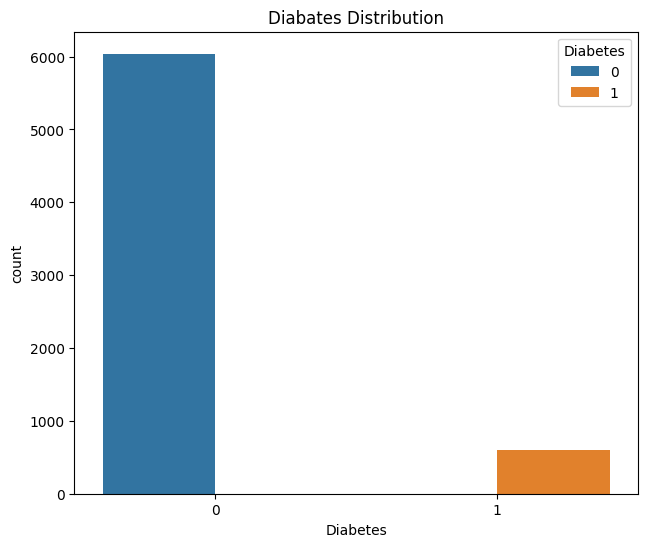

In [337]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("Diabates Distribution")
sns.countplot(x = df_filtered['Diabetes'], hue=df_filtered['Diabetes'])

In [338]:
# The data has less number of diabetes people than people with diabates which shows that the data we have is imblance.

### Univariate Analysyis

In [339]:
def percentage_above_bar_relative_to_xgroup(ax):
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')

In [340]:
# creating method for univariate_countplot to avoid redundency
def univariate_countplot(df,col,h,figure_size=(6,6)):
    plt.figure(figsize=figure_size)
    plt.xticks(rotation='vertical')
    ax1 = sns.countplot(x=col,data=df,hue=df[h])
    ax1.set(xlabel='Class', ylabel='Count')
    percentage_above_bar_relative_to_xgroup(ax1)
    plt.show()

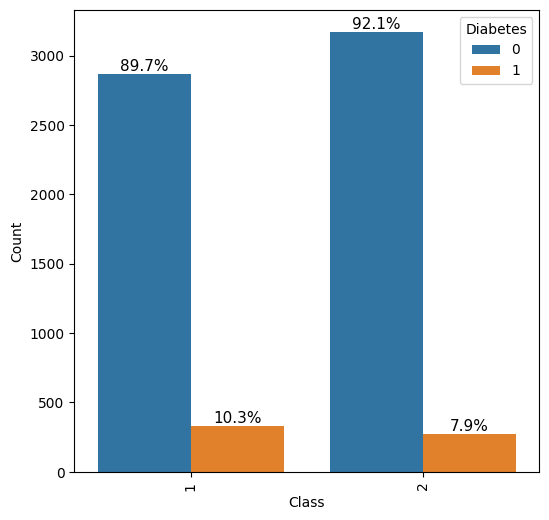

In [341]:
univariate_countplot(df_filtered,'Gender','Diabetes')

In [342]:
# From above, we can interprete thatration of diabetic patients in male and female is almost same.

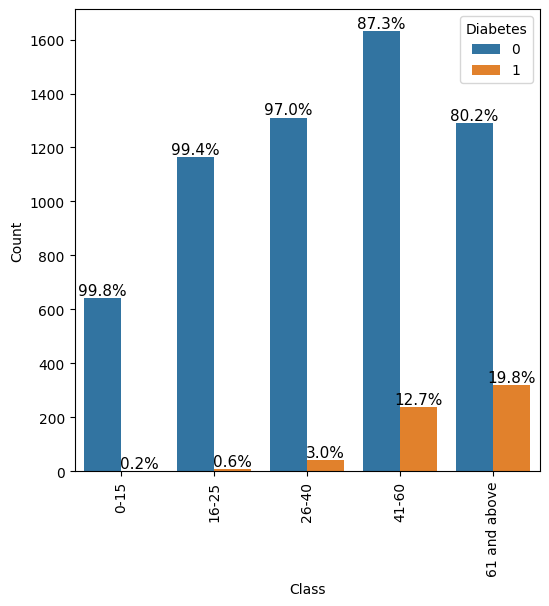

In [343]:
univariate_countplot(df_filtered,'Age_between','Diabetes')

In [344]:
# we can interpret that there more number of diabetic patients  in bins of 41 to 60 and 61 & above
# And also there is gradual increase in counts of diabetic patients in each bin 

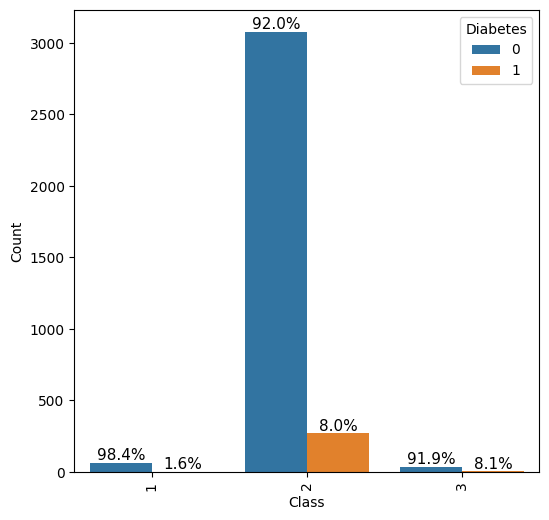

In [345]:
df_female = df_filtered[df_filtered['Gender']==2] # here 1 is encoded for male and 2 for female in dataset
univariate_countplot(df_female,'Pregnancy','Diabetes')


*   **1** is encoded to **The participant was not pregnant at exam**
*   **2** is encoded to **The participant was pregnant at exam**
*   **3** Not willing to answer





In [346]:
# We can see that pragnancy women has more number of diabatic patient than non pragnant 
# however cannot conclude this because as the age increases the chance of getting diabatic increases 

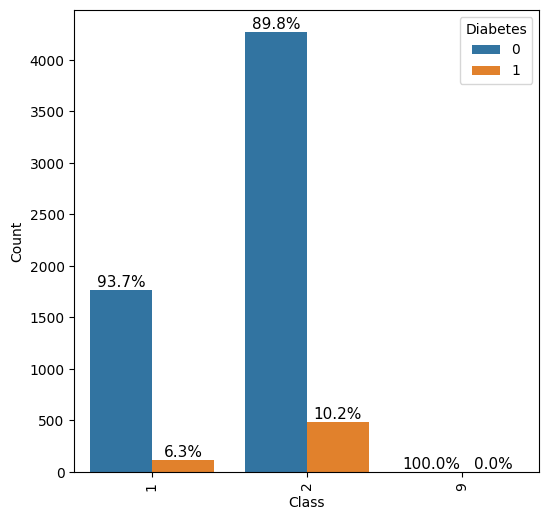

In [347]:
univariate_countplot(df_filtered,'Physical Activity','Diabetes')



*   **1** is encoded to **dailay physicl activity** like walking or running
*   **2** is encoded to no dailay physicl activity  



In [348]:
# By observing above, we can conclude that daily physical activity decrease chances of getting diabetic.

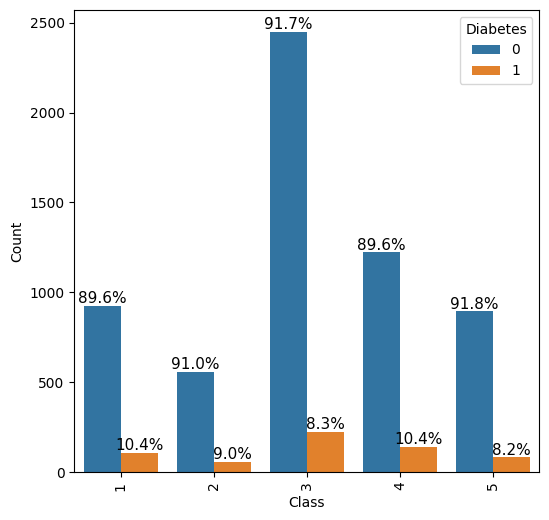

In [349]:
univariate_countplot(df_filtered,'Race','Diabetes')

In [350]:
# Almost the percentage of diabatic patients in each race is almost same, by this we can conclude that Race has no effect diabates.

## Analysis on Numerical Data

In [351]:
#creating defination for boxplot to avoid redundancy of code
def box_plot(col,df):
    plt.figure(figsize=(20,8))
    plt.subplot(1,3,1)
    sns.boxplot(y=col[0],x="Diabetes",data=df_filtered,hue=df_filtered["Diabetes"]).set_title(col[0])
    plt.subplot(1,3,2)
    sns.boxplot(y=col[1],x="Diabetes",data=df_filtered,hue=df_filtered["Diabetes"]).set_title(col[1])
    plt.subplot(1,3,3)
    sns.boxplot(y=col[2],x="Diabetes",data=df_filtered,hue=df_filtered["Diabetes"]).set_title(col[2])
    plt.show()
    

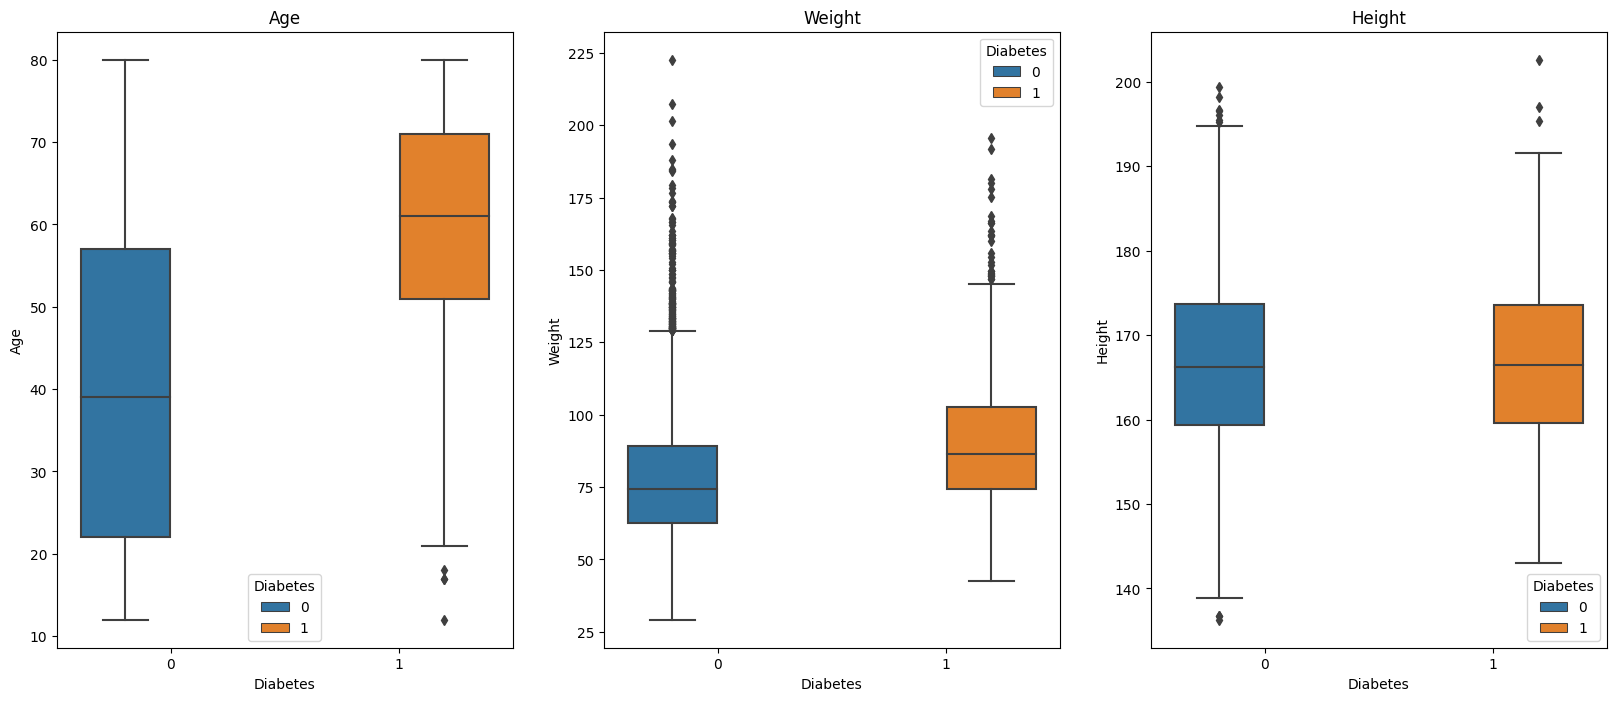

In [352]:
box_plot(['Age','Weight','Height'],df_filtered)

In [353]:
# from the above we can observe that weight plays major role in diabates

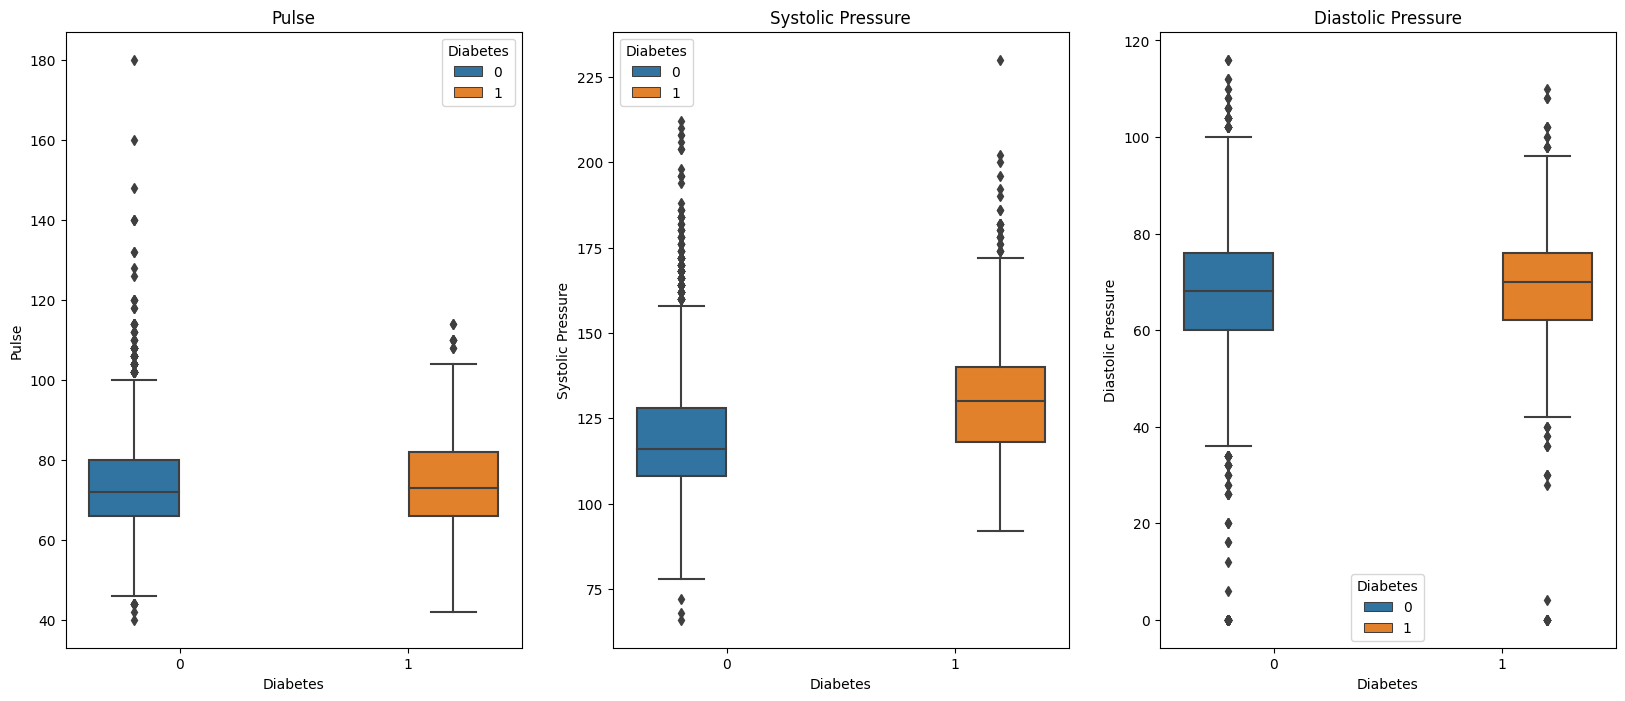

In [354]:
box_plot(['Pulse','Systolic Pressure','Diastolic Pressure'],df_filtered)

In [355]:
# we can interpret that pulse may bee normal for diabatic patients but the systolic presure is higher than it should be. ie 120

In [356]:
df_filtered.isnull().mean() * 100

Gender                                   0.0
Age                                      0.0
Race                                     0.0
Veteran Status                           0.0
Marital Status                           0.0
Pregnancy                                0.0
Ratio of Income to Poverty Guidelines    0.0
Weight                                   0.0
Height                                   0.0
BMI                                      0.0
Pulse                                    0.0
Systolic Pressure                        0.0
Diastolic Pressure                       0.0
Total Cholestrol(mg/dl)                  0.0
Glychohemoglobin                         0.0
Albumin Creatinine level                 0.0
Insulin Level                            0.0
Triglycerides                            0.0
Glucose                                  0.0
Physical Activity                        0.0
Fat Intake(gms in a day)                 0.0
Energy Intake(kcal in a day)             0.0
Protein In

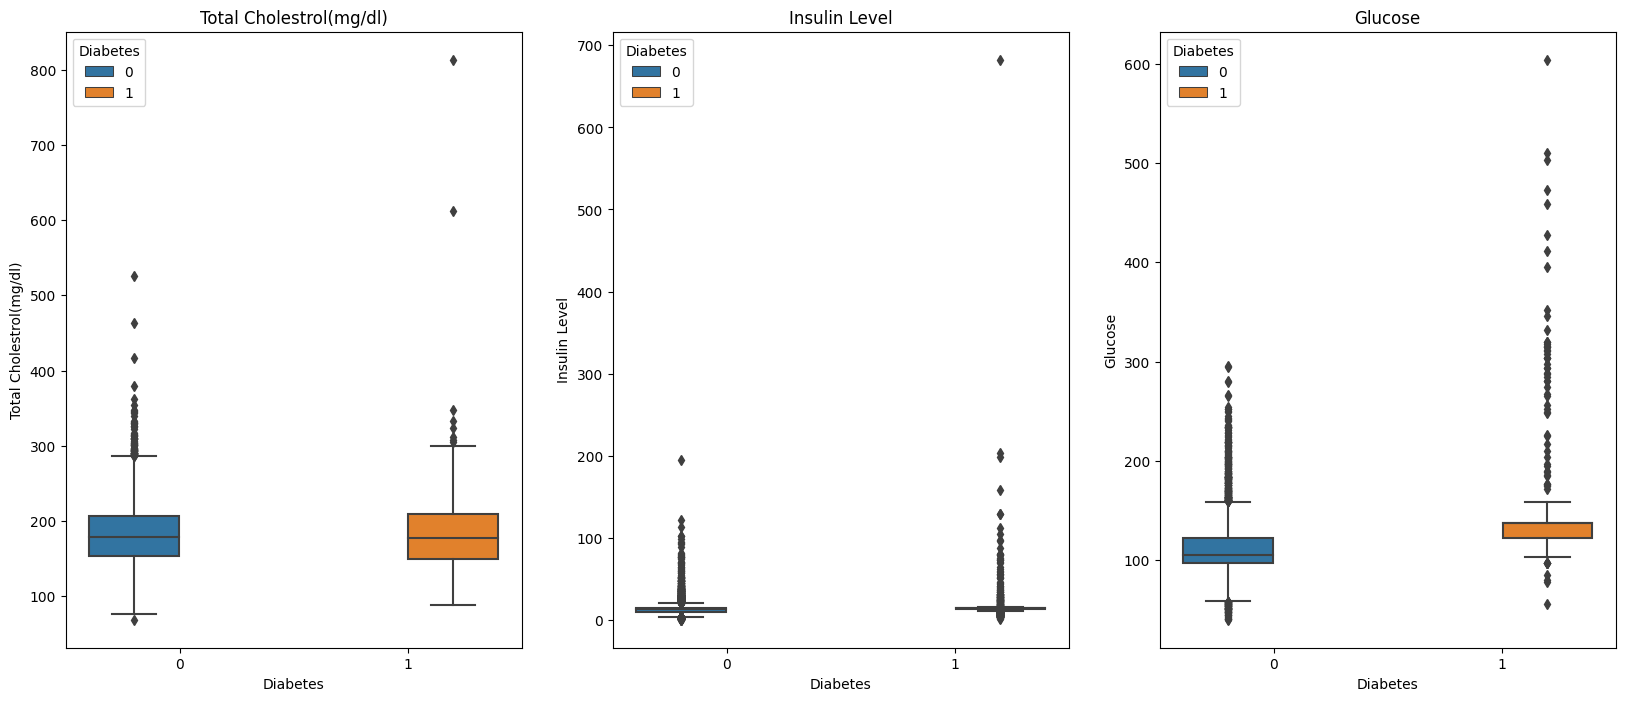

In [357]:
box_plot(['Total Cholestrol(mg/dl)','Insulin Level','Glucose'],df_filtered)

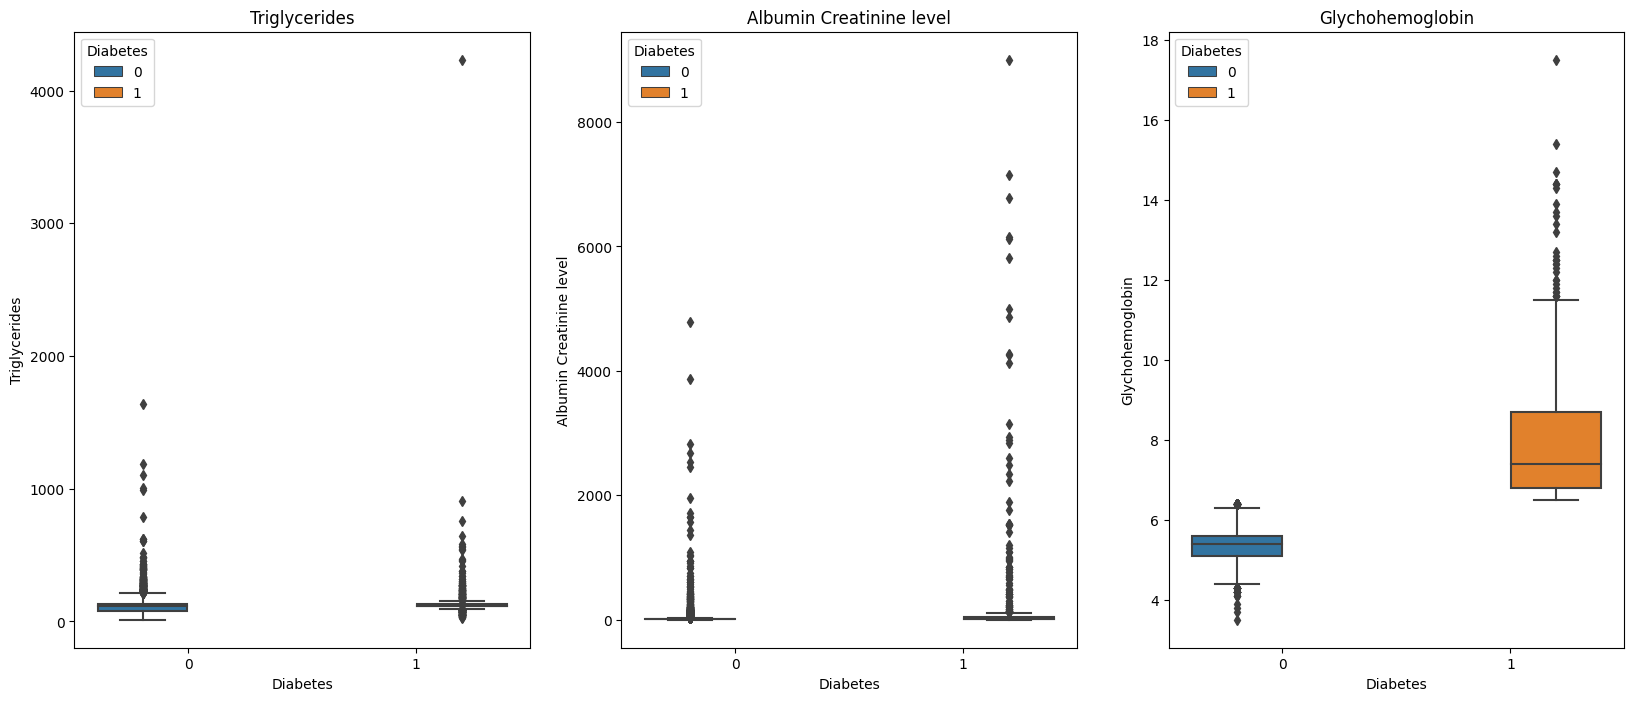

In [358]:
box_plot(['Triglycerides','Albumin Creatinine level','Glychohemoglobin'],df_filtered)

# **Principle Component Analysis**

In [359]:
df_pcs = df_filtered.copy()
df_pcs.drop(columns=['Age_between'],inplace=True)
df_pcs

,Gender,Age,Race,Veteran Status,Marital Status,Pregnancy,Ratio of Income to Poverty Guidelines,Weight,Height,BMI,...,Insulin Level,Triglycerides,Glucose,Physical Activity,Fat Intake(gms in a day),Energy Intake(kcal in a day),Protein Intake(gms in a day),Carbs Intake(gms in a day),Alcohol Intake(gms in a day),Diabetes
0,1,69.0,4,1,4,2,0.840000,78.3,171.3,26.7,...,13.826601,117.587179,137.616142,2,52.81,1574.0,43.63,239.59,0.0,1
1,1,54.0,3,2,1,2,1.780000,89.5,176.8,28.6,...,13.653004,132.911504,121.980741,2,124.29,5062.0,338.13,423.78,119.0,1
2,1,72.0,3,1,1,2,4.510000,88.9,175.3,28.9,...,5.830000,51.000000,137.616142,2,65.97,1743.0,64.61,224.39,0.0,1
3,2,73.0,3,2,1,2,5.000000,52.0,162.4,19.7,...,6.120000,75.000000,137.616142,2,55.36,1421.0,55.24,178.20,0.0,0
4,1,56.0,1,1,3,2,4.790000,105.0,158.7,41.7,...,13.653004,132.911504,121.980741,2,93.92,1785.0,55.11,189.59,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6638,1,52.0,3,2,1,2,5.000000,79.5,176.2,25.6,...,13.653004,132.911504,121.980741,2,17.97,1225.0,35.05,250.82,0.0,0
6639,1,61.0,1,2,1,2,3.530000,99.5,173.5,33.1,...,30.710000,103.000000,137.616142,2,95.36,2181.0,70.52,265.54,0.0,1
6640,1,80.0,3,2,1,2,3.090000,77.1,176.0,24.9,...,13.826601,117.587179,137.616142,2,69.26,2432.0,77.09,384.72,0.0,0
6641,1,26.0,2,2,5,2,2.414801,71.8,171.3,24.5,...,3.760000,81.000000,108.000000,2,193.51,4687.0,223.32,494.54,14.0,0


In [360]:
df_pca_train,df_pca_test = train_test_split(df_pcs,train_size=0.7,random_state=100)
print(df_pca_train.shape)
print(df_pca_test.shape)

(4650, 26)
(1993, 26)


In [361]:
# dividing training and testing data and x,y variables
X_train = df_pca_train.drop('Diabetes',axis = 1)
y_train = df_pca_train['Diabetes']
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)

# shape of test data
X_test = df_pca_test.drop('Diabetes',axis = 1)
y_test = df_pca_test['Diabetes']
print('X_test size: ',X_test.shape)
print('y_test size: ',y_test.shape)



X_train size:  (4650, 25)
y_train size:  (4650,)
X_test size:  (1993, 25)
y_test size:  (1993,)


In [362]:
# storing the column names 
X_train_cols = X_train.columns

X_test_cols = X_test.columns


In [363]:
# scaling the variables 
scaler = StandardScaler()
X_train[X_train_cols] = scaler.fit_transform(X_train)
X_test[X_test_cols] = scaler.transform(X_test)

In [364]:
X_train

,Gender,Age,Race,Veteran Status,Marital Status,Pregnancy,Ratio of Income to Poverty Guidelines,Weight,Height,BMI,...,Albumin Creatinine level,Insulin Level,Triglycerides,Glucose,Physical Activity,Fat Intake(gms in a day),Energy Intake(kcal in a day),Protein Intake(gms in a day),Carbs Intake(gms in a day),Alcohol Intake(gms in a day)
6095,-1.043078,-1.055879,0.729951,0.276977,0.759112,0.042371,-1.045001,-1.076850,0.273259,-1.271331,...,-0.133180,-0.015805,-0.330493,-0.625991,-1.579878,2.232062,2.467070,0.348096,3.066969,-0.344292
4612,-1.043078,-0.762717,-0.083828,0.276977,-0.769964,0.042371,-0.646312,-0.016085,1.327325,-0.548860,...,-0.136251,-0.090967,-0.581374,-0.351069,0.596843,0.467666,0.007076,-0.067202,-0.316021,-0.344292
4701,-1.043078,-1.397903,-0.083828,0.276977,0.759112,0.042371,1.410420,-1.085617,-0.170040,-1.135016,...,-0.122202,0.138198,-0.446470,-0.417540,-1.579878,-0.112996,0.380733,0.099629,0.983889,-0.344292
813,-1.043078,0.214492,-0.083828,0.276977,-0.769964,0.042371,1.638242,1.202480,1.504645,0.528032,...,-0.129085,0.624342,4.497545,-1.239546,0.596843,0.994680,1.324601,0.366781,1.801252,-0.207852
1469,0.958701,-1.446763,1.543731,0.276977,0.759112,0.042371,-0.380519,-1.274100,-1.440831,-0.916911,...,-0.129474,-0.387165,-0.581374,-0.417540,-1.579878,-0.557273,-0.886629,-0.113469,-1.196780,-0.344292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,-1.043078,0.703097,-0.897607,0.276977,-0.769964,0.042371,0.172990,-0.371135,-0.564084,-0.139914,...,-0.116448,-0.462976,-0.324637,0.890822,0.596843,-0.145746,1.604076,1.305482,2.747861,0.346176
79,-1.043078,0.409934,-0.083828,-3.310609,-0.769964,0.042371,-0.880463,0.935097,0.558940,0.746136,...,-0.121743,0.021281,0.221335,0.201918,0.596843,1.259910,0.784078,0.253336,0.596886,-0.344292
3927,0.958701,-0.078671,-0.897607,-3.310609,-0.005426,0.042371,0.233337,-1.217117,-0.642892,-1.135016,...,-0.134168,0.021281,0.221335,0.201918,0.596843,-0.348278,-0.249877,-0.748539,0.208328,-0.344292
5955,0.958701,-0.469554,0.729951,0.276977,-0.769964,0.042371,1.638242,0.580048,0.470280,0.418979,...,-0.106952,-0.090967,0.070421,-0.351069,0.596843,-0.083263,0.076689,-0.028274,0.089633,0.313099


In [365]:
# Applying SMOTE for imbalanced dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)

In [366]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 422
Before OverSampling, counts of label '0': 4228 

After OverSampling, the shape of train_X: (8456, 25)
After OverSampling, the shape of train_y: (8456,) 

After OverSampling, counts of label '1': 4228
After OverSampling, counts of label '0': 4228


In [367]:
X_train_res.shape

(8456, 25)

In [368]:
pca = PCA(random_state=100,svd_solver='randomized')
pca.fit(X_train_res)

PCA(random_state=100, svd_solver='randomized')

In [369]:
pca.components_

array([[-2.74539161e-02,  2.05573073e-01, -1.58170245e-02,
        -7.45082625e-02, -8.70373422e-02,  1.25195161e-02,
        -3.52709872e-02,  1.78967682e-01,  1.34699906e-02,
         1.93703911e-01,  3.04004981e-02,  2.53657751e-01,
         1.00609558e-01,  6.72961956e-02,  5.39646921e-01,
         5.99159373e-01,  2.34193783e-01,  1.54341118e-01,
         2.29109762e-01,  7.04161504e-02, -2.85797147e-02,
        -4.39978236e-02, -1.42884195e-02, -5.14254504e-02,
        -2.50748351e-02],
       [-6.11100337e-02, -1.28809597e-01,  1.11781578e-02,
        -4.46058915e-02,  6.91886249e-02, -8.80988290e-03,
         2.23353047e-03, -1.61590337e-01,  3.26480615e-02,
        -1.98507230e-01, -2.36584798e-02, -6.08993761e-03,
        -3.63411129e-02, -7.03592579e-02, -3.56928120e-01,
         7.66197694e-01, -2.45015876e-01, -1.85705307e-01,
        -2.78599641e-01, -5.87295372e-02,  2.20245115e-02,
         5.04266857e-02,  5.07179331e-02,  5.53337124e-02,
         2.31122207e-02],
    

In [370]:
# looking at PCA explained varianced ratio
explained_variance = pca.explained_variance_
explained_variance

array([5.23040393e+00, 3.64515407e+00, 3.35480842e+00, 2.30201611e+00,
       1.96612610e+00, 1.75903359e+00, 1.70086371e+00, 1.50489697e+00,
       1.15810551e+00, 1.06534061e+00, 9.60397707e-01, 8.70022601e-01,
       7.57408563e-01, 7.15672459e-01, 6.81523869e-01, 6.37429922e-01,
       6.24666863e-01, 5.58264432e-01, 5.20199808e-01, 3.71807746e-01,
       2.82307588e-01, 2.79264571e-01, 2.03910762e-01, 7.05791515e-03,
       2.81624796e-04])

In [371]:
# proportion variance for each pc
proportion_variance = explained_variance / np.sum(explained_variance)
proportion_variance

array([1.67872701e-01, 1.16993231e-01, 1.07674428e-01, 7.38844774e-02,
       6.31039020e-02, 5.64571539e-02, 5.45901593e-02, 4.83004987e-02,
       3.71700356e-02, 3.41926947e-02, 3.08244944e-02, 2.79238555e-02,
       2.43094458e-02, 2.29699025e-02, 2.18738847e-02, 2.04586651e-02,
       2.00490277e-02, 1.79178050e-02, 1.66960999e-02, 1.19333748e-02,
       9.06081784e-03, 8.96315053e-03, 6.54462844e-03, 2.26527682e-04,
       9.03890325e-06])

In [372]:
# cummulative variance for each pc
cummulative_variance = np.cumsum(pca.explained_variance_ratio_)
cummulative_variance

array([0.1678727 , 0.28486593, 0.39254036, 0.46642484, 0.52952874,
       0.58598589, 0.64057605, 0.68887655, 0.72604659, 0.76023928,
       0.79106378, 0.81898763, 0.84329708, 0.86626698, 0.88814086,
       0.90859953, 0.92864856, 0.94656636, 0.96326246, 0.97519584,
       0.98425665, 0.9932198 , 0.99976443, 0.99999096, 1.        ])

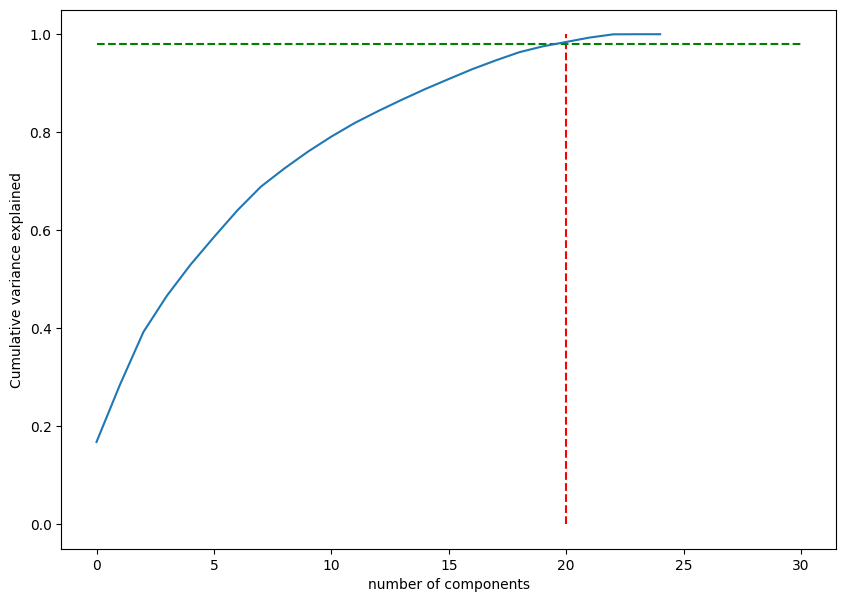

In [373]:
fig = plt.figure(figsize=[10,7])
plt.vlines(x=20, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.98, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(cummulative_variance)
plt.xlabel('number of components')
plt.ylabel("Cumulative variance explained")

plt.show()

In [374]:
pca_final = PCA(n_components=20)
train_pca = pca_final.fit_transform(X_train_res)

In [375]:
# looking at PCA explained varianced ratio
explained_variance_final = pca_final.explained_variance_
# proportion variance for each pc
proportion_variance_final = explained_variance_final / np.sum(explained_variance_final)
# cummulative variance for each pc
cummulative_variance_final = np.cumsum(pca_final.explained_variance_ratio_)

In [376]:
explained_variance_final

array([5.23040393, 3.64515407, 3.35480842, 2.30201611, 1.9661261 ,
       1.75903359, 1.70086371, 1.50489697, 1.15810551, 1.06534061,
       0.96039771, 0.8700226 , 0.75740856, 0.71567246, 0.68152387,
       0.63742992, 0.62466686, 0.55826443, 0.52019981, 0.37180775])

In [377]:
# Create a dataframe to store the results
df = pd.DataFrame({'Explained Variance': explained_variance_final,'Proportion Variance': proportion_variance_final,'Cumulative Variance': cummulative_variance_final},
                  index=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])
df

,Explained Variance,Proportion Variance,Cumulative Variance
PC1,5.230404,0.172143,0.167873
PC2,3.645154,0.119969,0.284866
PC3,3.354808,0.110413,0.392540
PC4,2.302016,0.075764,0.466425
PC5,1.966126,0.064709,0.529529
PC6,1.759034,0.057893,0.585986
PC7,1.700864,0.055979,0.640576
PC8,1.504897,0.049529,0.688877
PC9,1.158106,0.038115,0.726047
PC10,1.065341,0.035062,0.760239


In [378]:
train_pca.shape # this is transformed X_train_pca

(8456, 20)

In [379]:
# applying transformation on testset
# we dont need to apply smote here because we've already trained model on balanced dataset
test_pca = pca_final.transform(X_test)
test_pca.shape # transformed X_test pca

(1993, 20)

In [380]:
# creating pca's for train and test data
df_train_pca = pd.DataFrame(train_pca,
                  columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])
df_test_pca = pd.DataFrame(test_pca,
                  columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])

# **Evaluation Functions**

In [381]:
def evaluation_metric(actual,predicted,pred_prob=None):
    print ("Recall/Sensitivity : %.4g" % recall_score(actual, predicted))
    print('confusion metrics :\n' , confusion_matrix(actual, predicted))
    print('Accuracy of model \n', accuracy_score(actual, predicted))
    print("AUC Score : %.4g" % roc_auc_score(actual, pred_prob))

In [382]:
# function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None #fpr, tpr, thresholds

In [383]:
def models_metrics(model, actual,predicted,pred_prob=None):
    from sklearn import metrics
    confusion = confusion_matrix(actual, predicted, labels=[1,0])
    TP = confusion[0,0] # true positive 
    TN = confusion[1,1] # true negatives
    FP = confusion[1,0] # false positives
    FN = confusion[0,1] # false negatives
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion, display_labels = ['Positive(1)', 'Negative(0)'])
    cm_display.plot()
    cm_display.ax_.set_title('Diabetes Prediction')
    plt.show()
    metric_df = pd.DataFrame(columns=['Model', 'Sensitivity', 'Specificity','Accuracy','AUC Score', 'F1-Score'])
    add_row = {'Model': model, 'Sensitivity': (TP / float(TP+FN)), 'Specificity': (TN / float(TN+FP)),
               'Accuracy' : accuracy_score(actual, predicted),'AUC Score': roc_auc_score(actual, pred_prob), 'F1-Score': f1_score(actual, predicted)}
    # if(report):
    #   report(add_row)
    metric_df = metric_df.append(add_row, ignore_index = True)
    return metric_df

In [384]:
def all_metrics(actual,predicted):
    confusion = confusion_matrix(actual, predicted)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity : %.4g' % (TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity : %.4g' % (TN / float(TN+FP)))
    # Calculate false postive rate - predicting Diabetic when customer does not have Diabetic
    print('FPR : %.4g' % (FP/ float(TN+FP)))
    # positive predictive value 
    print ('Positive predictive value : %.4g'%(TP / float(TP+FP)))
    # Negative predictive value
    print ('Negative predictive value : %.4g'%(TN / float(TN+ FN)))

# **Model Building and Evaluation**

## Logistic Regression

In [412]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression #import the package
X_train_logreg = df_train_pca.copy() 
y_train_logreg = y_train_res.copy()
X_test_logreg = df_test_pca.copy()
y_test_logreg = y_test.copy()     

print(X_train_logreg.shape)
print(y_train_logreg.shape)
print(X_test_logreg.shape)
print(y_test_logreg.shape)


(8456, 20)
(8456,)
(1993, 20)
(1993,)


In [413]:
lr = LogisticRegression()
lr.fit(X_train_logreg,y_train_logreg)

LogisticRegression()

In [414]:
y_train_pred_logreg = lr.predict(X_train_logreg)
y_train_pred_proba_logreg = lr.predict_proba(X_train_logreg)

In [415]:
#calling evalutaion metric funtion created earlier to see the performance on the train data
df_train_logistic_regression = all_metrics(y_train_logreg, y_train_pred_logreg)
df_train_logistic_regression

Sensitivity : 1
Specificity : 0.9927
FPR : 0.007332
Positive predictive value : 0.9927
Negative predictive value : 1


In [416]:
y_test_pred_logreg = lr.predict(X_test_logreg)
y_test_pred_proba_logreg = lr.predict_proba(X_test_logreg)

In [417]:
#calling evalutaion metric funtion created earlier to see the performance on the test data
df_logistic_regression = all_metrics(y_test_logreg, y_test_pred_logreg)
df_logistic_regression

Sensitivity : 0.9945
Specificity : 0.9934
FPR : 0.006626
Positive predictive value : 0.9378
Negative predictive value : 0.9994


#### Ploting ROC Curve

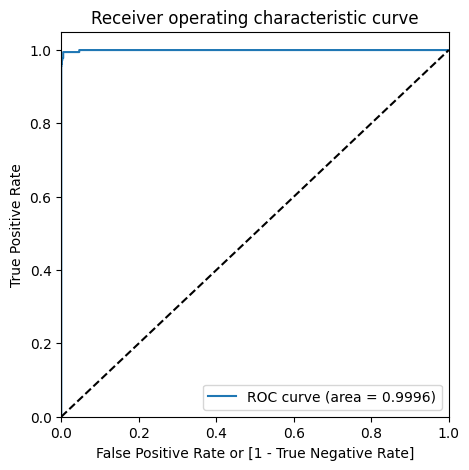

In [418]:
#roc curve
draw_roc(y_test_logreg,y_test_pred_proba_logreg[:, 1])

## KNN Clssifier

In [419]:
# KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
X_train_knn = df_train_pca.copy() 
y_train_knn = y_train_res.copy()
X_test_knn = df_test_pca.copy()
y_test_knn = y_test.copy()

print(X_train_knn.shape)
print(y_train_knn.shape)
print(X_test_knn.shape)
print(y_test_knn.shape)

(8456, 20)
(8456,)
(1993, 20)
(1993,)


Text(0, 0.5, 'Accuracy Score')

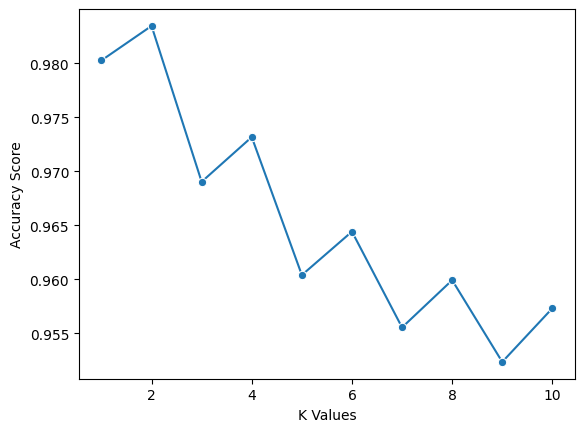

In [420]:
# Finding optimal K using cross validation
k_values = [i for i in range (1,11)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train_knn, y_train_knn, cv=5, scoring= 'accuracy')
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [421]:
# Getting optimal k
optimal_k = k_values[scores.index(max(scores))]
optimal_k

2

In [422]:
# Fitting the model
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_knn, y_train_knn)
y_pred_knn = knn.predict(X_test_knn)
y_pred_k = knn.predict(X_train_knn)

In [423]:
y_scores_k = knn.predict_proba(X_train_knn)

In [424]:
all_metrics(y_test_knn, y_pred_knn)


Sensitivity : 0.7363
Specificity : 0.9752
FPR : 0.02485
Positive predictive value : 0.7486
Negative predictive value : 0.9735


In [425]:
evaluation_metric(y_train_knn, y_pred_k, y_scores_k[:, 1])

Recall/Sensitivity : 1
confusion metrics :
 [[4228    0]
 [   0 4228]]
Accuracy of model 
 1.0
AUC Score : 1


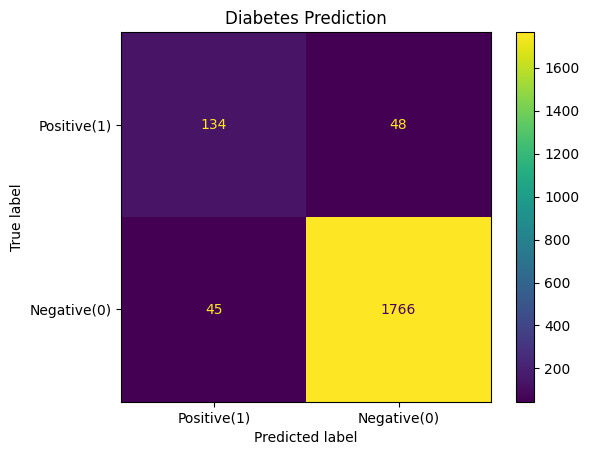

In [426]:
# Calculating Accuracy, AUC

y_scores_knn = knn.predict_proba(X_test_knn)
df_knn = models_metrics('KNN', y_test_knn, y_pred_knn, y_scores_knn[:, 1])

In [427]:
df_knn

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,KNN,0.736264,0.975152,0.953337,0.90173,0.742382


In [428]:
y_test_knn.value_counts()

0    1811
1     182
Name: Diabetes, dtype: int64

In [429]:
(y_pred_knn)

array([0, 0, 0, ..., 1, 0, 0])

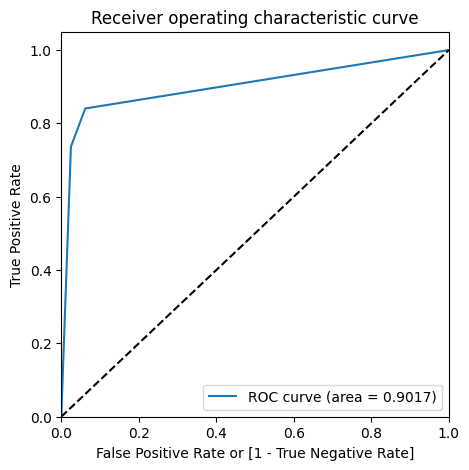

In [430]:
# ROC
draw_roc(y_test_knn, y_scores_knn[:, 1])

In [431]:
confusion = confusion_matrix(y_test_knn, y_pred_knn, labels=[1,0])

In [432]:
confusion

array([[ 134,   48],
       [  45, 1766]])

## Decision Trees

In [433]:
from sklearn.tree import DecisionTreeClassifier

# Load the data
X_train_decision = df_train_pca.copy() 
y_train_decision = y_train_res.copy()
X_test_decision = df_test_pca.copy()
y_test_decision = y_test.copy()

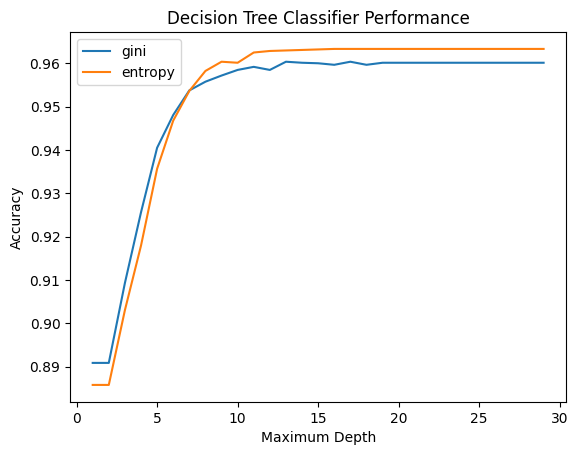

In [434]:
# Finding optimal depth and impurity method 
# Define the range of maximum depths and impurity methods to try
max_depths = range(1, 30)
impurity_methods = ['gini', 'entropy']

# Initialize an empty dictionary to store the cross-validation scores
cv_scores = {}

# Loop over the maximum depths and impurity methods and compute the cross-validation score for each
for method in impurity_methods:
    cv_scores[method] = []
    for depth in max_depths:
        # Create a decision tree classifier with the current maximum depth and impurity method
        clf = DecisionTreeClassifier(max_depth=depth, criterion=method, random_state=100)
        
        # Compute the cross-validation score using 5-fold cross-validation
        scores = cross_val_score(clf, X_train_decision, y_train_decision, cv=5)
        
        # Append the mean cross-validation score to the list for the current impurity method
        cv_scores[method].append(np.mean(scores))

# Plot the cross-validation performance for different maximum depths and impurity methods
for method in impurity_methods:
    plt.plot(max_depths, cv_scores[method], label=method)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Performance')
plt.legend()
plt.show()

In [435]:
cv_scores['entropy'].index(max(cv_scores['entropy']))

15

In [436]:
#Optimum depth and impurity method
for i in impurity_methods:
  optimal_k = cv_scores[i].index(max(cv_scores[i]))
  print(i + ' ' + str(optimal_k))

gini 12
entropy 15


In [437]:
#Fitting the model
dt_classifier = DecisionTreeClassifier(max_depth=21, criterion='entropy', random_state=100)
dt_classifier.fit(X_train_decision, y_train_decision)

# Predict the labels of the test data
y_pred_decision = dt_classifier.predict(X_test_decision)

In [438]:
y_pred_decision_prob = dt_classifier.predict_proba(X_test_decision)

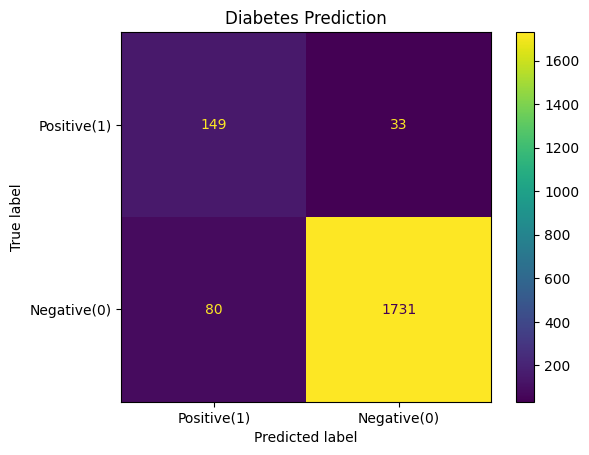

In [439]:
df_decision = models_metrics('Decision Tree',y_test_decision, y_pred_decision, y_pred_decision_prob[:, 1])

In [440]:
df_decision

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Decision Tree,0.818681,0.955826,0.943302,0.887253,0.725061


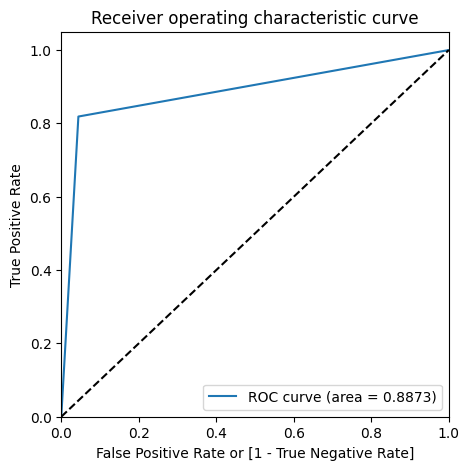

In [441]:
draw_roc(y_test_decision, y_pred_decision_prob[:, 1])

## Naive Bayes Classifier

In [442]:
# Load the data
X_train_naive = df_train_pca.copy() 
y_train_naive = y_train_res.copy()
X_test_naive = df_test_pca.copy()
y_test_naive = y_test.copy()

In [443]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_clf = GaussianNB()

# Fit the classifier to the training data
naive_bayes_clf.fit(X_train_naive, y_train_naive)

# Predict the labels of the test data
y_pred_naive = naive_bayes_clf.predict(X_test_naive)
y_pred_naive_prob = naive_bayes_clf.predict_proba(X_test_naive)

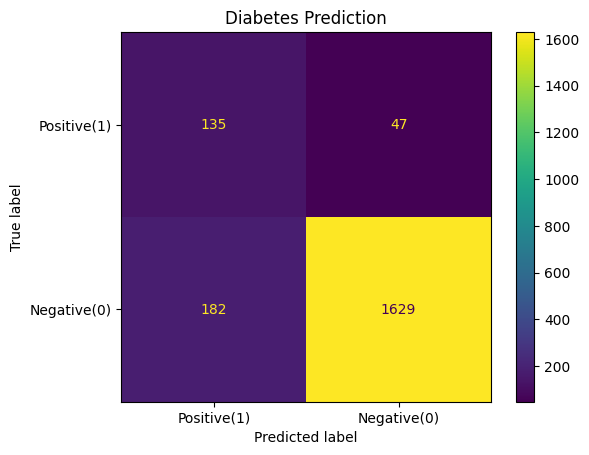

In [444]:
df_naive = models_metrics('Naive Bayes',y_test_naive, y_pred_naive, y_pred_naive_prob[:, 1])

In [445]:
df_naive

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Naive Bayes,0.741758,0.899503,0.885098,0.877486,0.541082


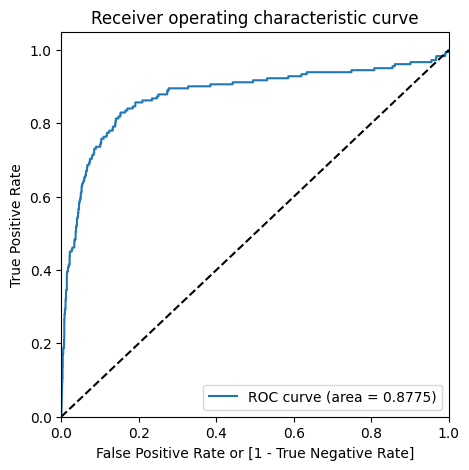

In [446]:
draw_roc(y_test_naive, y_pred_naive_prob[:, 1])

## SVM (Support Vector Machines)

In [454]:
from sklearn.svm import SVC

In [455]:
X_train_svm = df_train_pca.copy() 
y_train_svm = y_train_res.copy()
X_test_svm = df_test_pca.copy()
y_test_svm = y_test.copy()

print(X_train_svm.shape)
print(y_train_svm.shape)
print(X_test_svm.shape)
print(y_test_svm.shape)


(8456, 20)
(8456,)
(1993, 20)
(1993,)


In [456]:
svc = SVC(probability=True)
svc.fit(X_train_svm,y_train_svm)

SVC(probability=True)

In [457]:
y_train_pred_svm = svc.predict(X_train_svm)
y_train_pred_proba_svm = svc.predict_proba(X_train_svm)

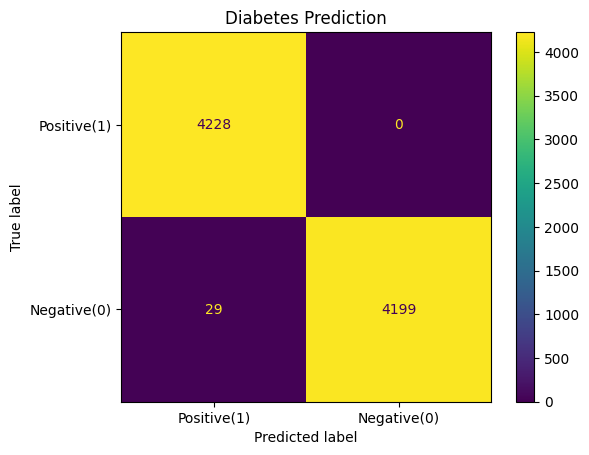

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,SVM,1.0,0.993141,0.99657,0.999997,0.996582


In [458]:
#calling evalutaion metric funtion created earlier to see the performance on the train data
df_train_svm = models_metrics('SVM',y_train_svm, y_train_pred_svm,y_train_pred_proba_svm[:, 1])
df_train_svm

In [459]:
y_test_pred_svm = svc.predict(X_test_svm)
y_test_pred_proba_svm = svc.predict_proba(X_test_svm)

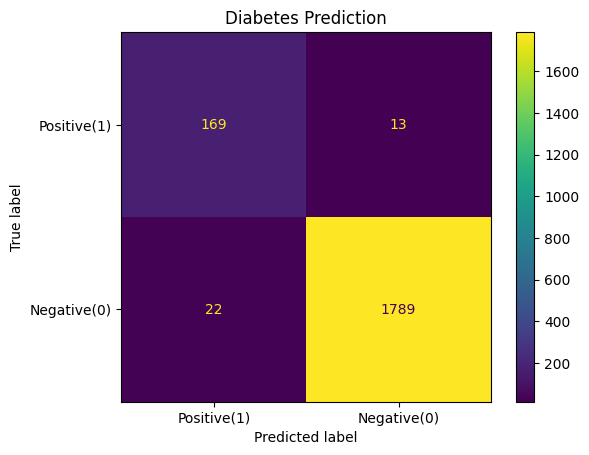

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,SVM,0.928571,0.987852,0.982439,0.997503,0.906166


In [460]:
#calling evalutaion metric funtion created earlier to see the performance on the test data
df_test_svm = models_metrics("SVM",y_test_svm, y_test_pred_svm,y_test_pred_proba_svm[:, 1])
df_test_svm

#### Ploting ROC Curve

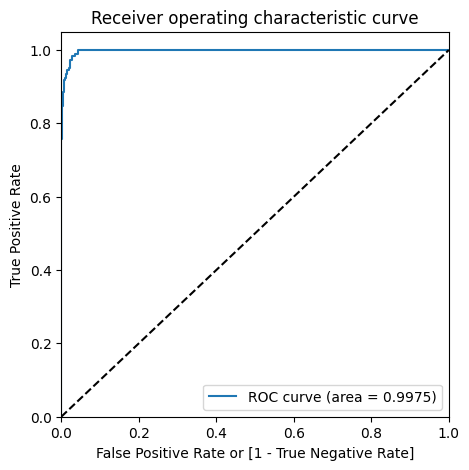

In [461]:
#roc curve
draw_roc(y_test_svm,y_test_pred_proba_svm[:, 1])

## Random Forest

In [464]:
X_train_rf = df_train_pca.copy() 
y_train_rf = y_train_res.copy()
X_test_rf = df_test_pca.copy()
y_test_rf = y_test.copy()

print(X_train_rf.shape)
print(y_train_rf.shape)
print(X_test_rf.shape)
print(y_test_rf.shape)


(8456, 20)
(8456,)
(1993, 20)
(1993,)


In [465]:
from sklearn.ensemble import RandomForestClassifier

In [466]:
rf = RandomForestClassifier()
rf.fit(X_train_rf,y_train_rf)

RandomForestClassifier()

In [467]:
y_train_pred_rf = rf.predict(X_train_rf)
y_train_pred_proba_rf = rf.predict_proba(X_train_rf)

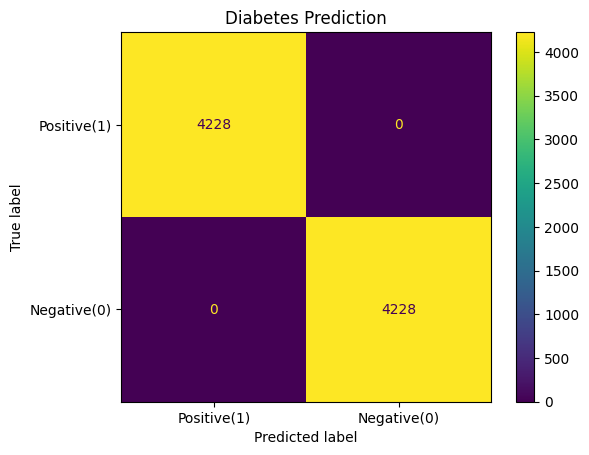

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Random Forest,1.0,1.0,1.0,1.0,1.0


In [469]:
#calling evalutaion metric funtion created earlier to see the performance on the train data
df_train_random_forest = models_metrics("Random Forest",y_train_rf, y_train_pred_rf,y_train_pred_proba_rf[:, 1])
df_train_random_forest

In [470]:
y_test_pred_rf = rf.predict(X_test_rf)
y_test_pred_proba_rf = rf.predict_proba(X_test_rf)

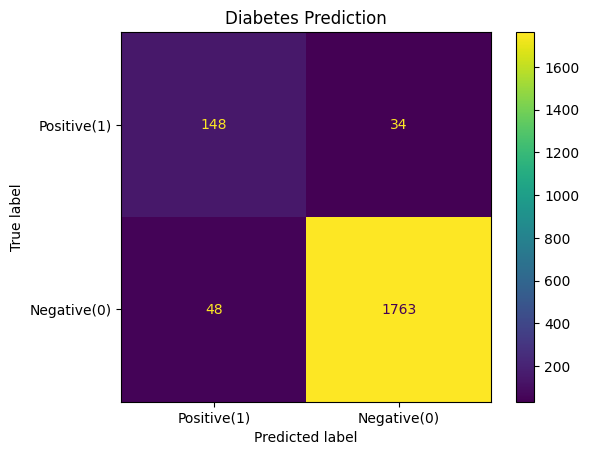

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Random Forest,0.813187,0.973495,0.958856,0.983553,0.783069


In [471]:
#calling evalutaion metric funtion created earlier to see the performance on the test data
df_test_random_forest = models_metrics("Random Forest",y_test_rf, y_test_pred_rf,y_test_pred_proba_rf[:, 1])
df_test_random_forest

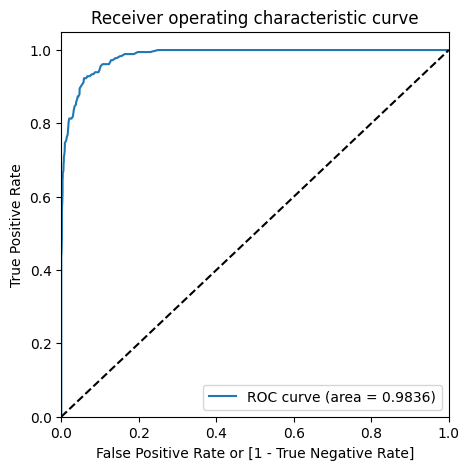

In [472]:
#roc curve
draw_roc(y_test_rf,y_test_pred_proba_rf[:, 1])

#**Hyper Parameter tuning for selected models**

## Logistic Regression with parameter tuning

In [479]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV #import the package
X_train_logreg = df_train_pca.copy() 
y_train_logreg = y_train_res.copy()
X_test_logreg = df_test_pca.copy()
y_test_logreg = y_test.copy()     

print(X_train_logreg.shape)
print(y_train_logreg.shape)
print(X_test_logreg.shape)
print(y_test_logreg.shape)

(8456, 20)
(8456,)
(1993, 20)
(1993,)


In [480]:
num_c = [0.01, 0.1, 1, 10, 50, 100, 200, 300]
cv_num = StratifiedKFold(n_splits=3,shuffle=True,random_state=10)
params_grid = dict(Cs = num_c)

In [481]:
# initializing logistic regression with cross validation 
logreg_model = LogisticRegressionCV(penalty='l2',random_state=10)

In [482]:
logreg_model_grid = GridSearchCV(estimator = logreg_model,
                                 param_grid = params_grid,
                                 scoring = 'roc_auc',
                                 cv = cv_num,
                                 verbose = 1,
                                 n_jobs=-1,
                                 return_train_score = True
)

In [483]:
# fitting the model
logreg_model_grid.fit(X_train_logreg,y_train_logreg)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=True),
             estimator=LogisticRegressionCV(random_state=10), n_jobs=-1,
             param_grid={'Cs': [0.01, 0.1, 1, 10, 50, 100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [484]:
scores = logreg_model_grid.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Cs,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.003017,0.000606,0.000000,0.000000,0.01,{'Cs': 0.01},NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
1,0.002028,0.000123,0.000000,0.000000,0.1,{'Cs': 0.1},NaN,NaN,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN
2,0.079137,0.004902,0.007138,0.000517,1,{'Cs': 1},0.985475,0.983102,0.983301,0.983959,0.001075,6,0.983112,0.984362,0.984975,0.98415,0.000775
3,1.243024,0.080919,0.008010,0.001381,10,{'Cs': 10},0.999998,0.999998,0.999994,0.999997,0.000002,5,1.000000,1.000000,1.000000,1.00000,0.000000
4,5.301091,1.010858,0.011698,0.006241,50,{'Cs': 50},0.999998,0.999999,0.999994,0.999997,0.000002,1,1.000000,1.000000,1.000000,1.00000,0.000000


In [485]:
# Best score with best C
best_score = logreg_model_grid.best_score_
best_C = logreg_model_grid.best_params_['Cs']

print(" The highest test roc_auc is {0} at Cs = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9999973140388153 at Cs = 50


## Logistic regression with optimal C

In [486]:
lr = LogisticRegressionCV(Cs = 100, penalty = 'l2', random_state = 7)

In [487]:
#fitting the model
lr.fit(X_train_logreg,y_train_logreg)

LogisticRegressionCV(Cs=100, random_state=7)

In [488]:
# predicts the Diabetic probability for train data
y_train_pred_logreg_prob = lr.predict_proba(X_train_logreg)[:,1]

y_train_pred_logreg_final = pd.DataFrame({'Diabetic':y_train_logreg.values, 'Diabetic_Prob':y_train_pred_logreg_prob})
y_train_pred_logreg_final['Patient_ID'] = y_train_logreg.index

y_train_pred_logreg_final.head()

,Diabetic,Diabetic_Prob,Patient_ID
0,0,5.254900e-25,0
1,0,9.668540e-37,1
2,0,3.677127e-35,2
3,0,4.285880e-31,3
4,0,6.332165e-29,4


In [489]:
# predicting Ciabetic for train data
# Creating new column 'predicted' with 1 if Diabetic_Prob > 0.5 else 0
y_train_pred_logreg_final['predicted'] = y_train_pred_logreg_final.Diabetic_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_logreg_final.head()


,Diabetic,Diabetic_Prob,Patient_ID,predicted
0,0,5.254900e-25,0,0
1,0,9.668540e-37,1,0
2,0,3.677127e-35,2,0
3,0,4.285880e-31,3,0
4,0,6.332165e-29,4,0


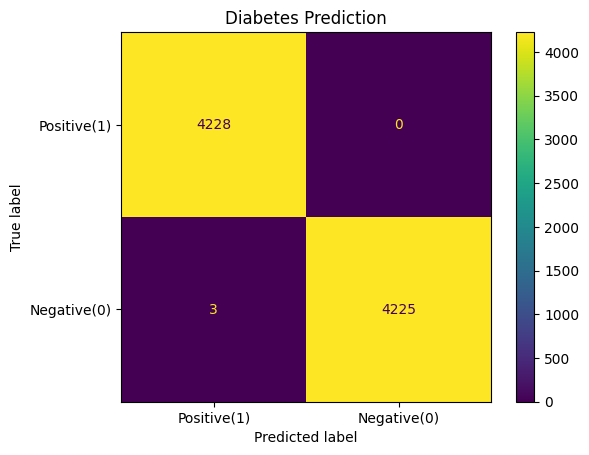

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Logistic RegressionCV,1.0,0.99929,0.999645,1.0,0.999645


In [490]:
#calling evalutaion metric funtion created earlier to see the performance
df_train_logistic_regressioncv = models_metrics("Logistic RegressionCV",y_train_pred_logreg_final.Diabetic, y_train_pred_logreg_final.predicted, y_train_pred_logreg_final.Diabetic_Prob)
df_train_logistic_regressioncv

### Finding optimal cutoff

In [491]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_logreg_final[i]= y_train_pred_logreg_final.Diabetic_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_logreg_final.head()

,Diabetic,Diabetic_Prob,Patient_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,5.254900e-25,0,0,1,0,0,0,0,0,0,0,0,0
1,0,9.668540e-37,1,0,1,0,0,0,0,0,0,0,0,0
2,0,3.677127e-35,2,0,1,0,0,0,0,0,0,0,0,0
3,0,4.285880e-31,3,0,1,0,0,0,0,0,0,0,0,0
4,0,6.332165e-29,4,0,1,0,0,0,0,0,0,0,0,0


In [492]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_logreg_final.Diabetic, y_train_pred_logreg_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.997635  1.000000  0.995270
0.2   0.2  0.998817  1.000000  0.997635
0.3   0.3  0.999409  1.000000  0.998817
0.4   0.4  0.999527  1.000000  0.999054
0.5   0.5  0.999645  1.000000  0.999290
0.6   0.6  0.999763  1.000000  0.999527
0.7   0.7  0.999527  0.999527  0.999527
0.8   0.8  0.999172  0.998344  1.000000
0.9   0.9  0.997871  0.995743  1.000000


<Figure size 500x500 with 0 Axes>

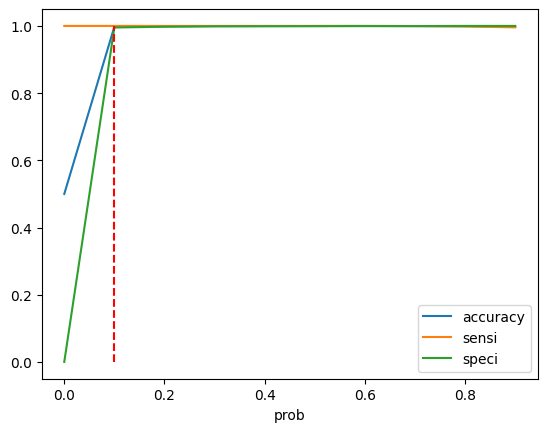

In [493]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=(5,5))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.1, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

In [494]:
# from the curve, we can observe that, all the metric scores are high at 0.1 cutoff, and we are intrested in senisitivity

In [495]:
# Final cutoff points and predictions by the model
y_train_pred_logreg_final['final_predicted'] = y_train_pred_logreg_final.Diabetic.map( lambda x: 1 if x > 0.1 else 0)

y_train_pred_logreg_final.head()

,Diabetic,Diabetic_Prob,Patient_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,5.254900e-25,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,9.668540e-37,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,3.677127e-35,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,4.285880e-31,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,6.332165e-29,4,0,1,0,0,0,0,0,0,0,0,0,0


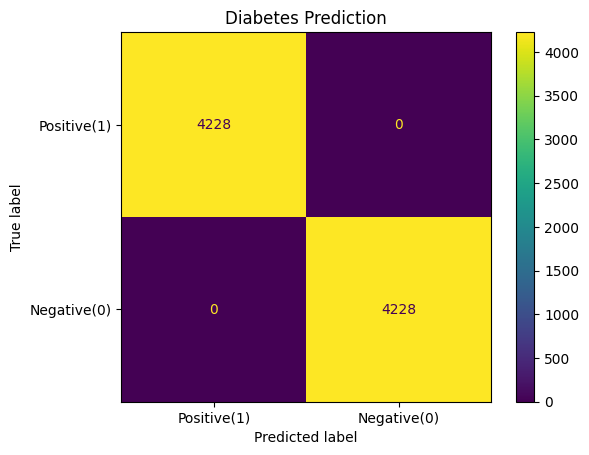

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Logistic RegressionCV,1.0,1.0,1.0,1.0,1.0


In [497]:
# Let's check the overall accuracy on the train dat after deciding the cutoff.
df_train_logistic_regressioncv = models_metrics("Logistic RegressionCV",y_train_pred_logreg_final.Diabetic, y_train_pred_logreg_final.final_predicted, y_train_pred_logreg_final.Diabetic_Prob)
df_train_logistic_regressioncv

```On balanced data using SMOTE```

```AUC Score``` on the train data after deciding the cutoff: 100%

```Recall/Sensitivity``` on the train data after deciding the cutoff : 100%

```Specificity``` on the train data after deciding the cutoff : 100%

```Accuracy``` on the train data after deciding the cutoff: 100%

In [498]:
# predicts the Diabetic probability for test data
y_test_pred_logreg_prob = lr.predict_proba(X_test_logreg)[:,1]

y_test_pred_logreg_final = pd.DataFrame({'Diabetic':y_test_logreg.values, 'Diabetic_Prob':y_test_pred_logreg_prob})
y_test_pred_logreg_final['Patient_ID'] = y_test_logreg.index
y_test_pred_logreg_final.head()

,Diabetic,Diabetic_Prob,Patient_ID
0,0,2.647774e-26,3804
1,0,1.155134e-40,2160
2,0,1.981679e-27,290
3,0,5.485906e-01,3488
4,0,1.246622e-34,865


In [499]:
# putiing final cutoff points and making predictions by the model on the data
y_test_pred_logreg_final['final_predicted'] = y_test_pred_logreg_final.Diabetic_Prob.map( lambda x: 1 if x > 0.1 else 0)

y_test_pred_logreg_final.head()

,Diabetic,Diabetic_Prob,Patient_ID,final_predicted
0,0,2.647774e-26,3804,0
1,0,1.155134e-40,2160,0
2,0,1.981679e-27,290,0
3,0,5.485906e-01,3488,1
4,0,1.246622e-34,865,0


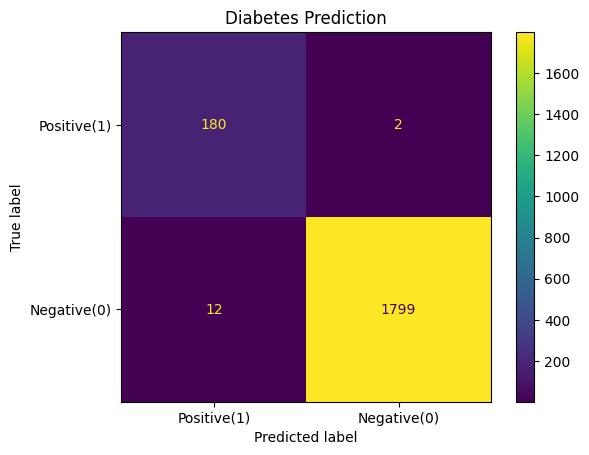

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Logistic RegressionCV,0.989011,0.993374,0.992975,0.999117,0.962567


In [500]:
#calling evalutaion metric funtion created earlier to see the performance on the test data
df_test_logistic_regressioncv = models_metrics("Logistic RegressionCV",y_test_pred_logreg_final.Diabetic, y_test_pred_logreg_final.final_predicted,y_test_pred_logreg_final.Diabetic_Prob )
df_test_logistic_regressioncv

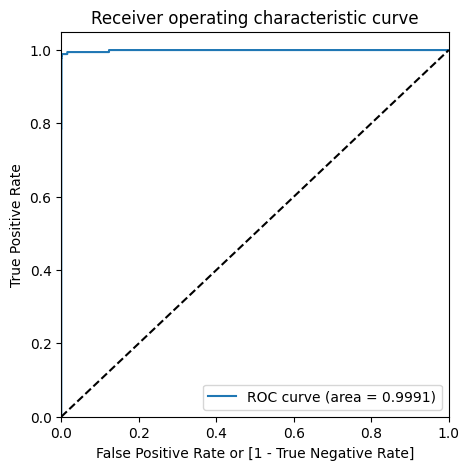

In [501]:
#roc curve
draw_roc(y_test_pred_logreg_final.Diabetic,y_test_pred_logreg_final.Diabetic_Prob)

## SVM with Parameter Tuning

## Hyper Parameter Tuningh

In [502]:
from sklearn.svm import SVC
# paraneter tuning with non linear kernal
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

svm1 = SVC(probability=True)

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        verbose = 3,
                        n_jobs=-1,
                       return_train_score=True) 
model_cv.fit(X_train_svm, y_train_svm)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='f1', verbose=3)

In [503]:
#score of the model
scores = model_cv.cv_results_

In [504]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.027211,0.820289,0.358498,0.002397,0.1,{'C': 0.1},0.984831,0.980847,0.988882,0.983130,...,0.984168,0.002676,5,0.987589,0.985571,0.985435,0.985571,0.986285,0.986090,0.000807
1,3.664270,0.555774,0.155796,0.007387,1,{'C': 1},0.990632,0.991774,0.994703,0.992958,...,0.993072,0.001746,4,0.996758,0.996612,0.996172,0.996024,0.996318,0.996377,0.000272
2,2.325061,0.251154,0.119124,0.040168,10,{'C': 10},0.995880,0.994111,0.998228,0.997054,...,0.996583,0.001460,1,0.999557,0.999852,0.999704,0.999557,0.999557,0.999645,0.000118
3,2.289275,0.347180,0.081477,0.006118,100,{'C': 100},0.995880,0.994111,0.997050,0.996466,...,0.996230,0.001211,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,2.188146,0.254049,0.104154,0.038823,1000,{'C': 1000},0.995880,0.994111,0.997050,0.996466,...,0.996230,0.001211,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


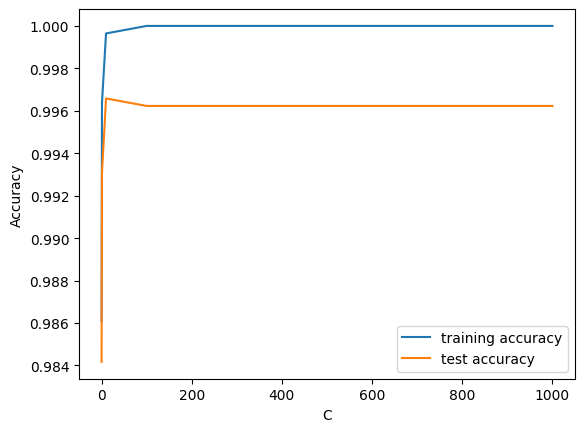

In [505]:
# plotting accuracies with C
plt.figure()
plt.plot(scores["param_C"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [506]:
# best params 
model_cv.best_params_

{'C': 10}

we are choosing the C = 0.1 because as c increases the model is overfitting

In [507]:
# fitting the final model
svc_final = SVC(C=0.1,kernel='rbf',probability=True)
svc_final.fit(X_train_svm,y_train_svm)

SVC(C=0.1, probability=True)

In [508]:
# predicting the values of y_train
y_train_pred_svc_final_prob = svc_final.predict_proba(X_train_svm)[:,1]
y_train_pred_svc_final_prob

array([3.65235404e-06, 1.00000010e-07, 1.00000010e-07, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [509]:
# predicts the Diabetic probability for train data
#y_train_pred_logreg_prob = logreg_model.predict_proba(X_train_pca_logreg)[:,1]

y_train_pred_svm_final = pd.DataFrame({'Diabetic':y_train_svm.values, 'Diabetic_Prob':y_train_pred_svc_final_prob})
y_train_pred_svm_final['Patient_ID'] = y_train_svm.index
y_train_pred_svm_final.head()

,Diabetic,Diabetic_Prob,Patient_ID
0,0,3.652354e-06,0
1,0,1.000000e-07,1
2,0,1.000000e-07,2
3,0,9.557815e-05,3
4,0,4.196046e-07,4


In [510]:
# predicting Diabetic for train data
# Creating new column 'predicted' with 1 if Diabetic_Prob > 0.5 else 0
y_train_pred_svm_final['predicted'] = y_train_pred_svm_final.Diabetic_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_svm_final.head()


,Diabetic,Diabetic_Prob,Patient_ID,predicted
0,0,3.652354e-06,0,0
1,0,1.000000e-07,1,0
2,0,1.000000e-07,2,0
3,0,9.557815e-05,3,0
4,0,4.196046e-07,4,0


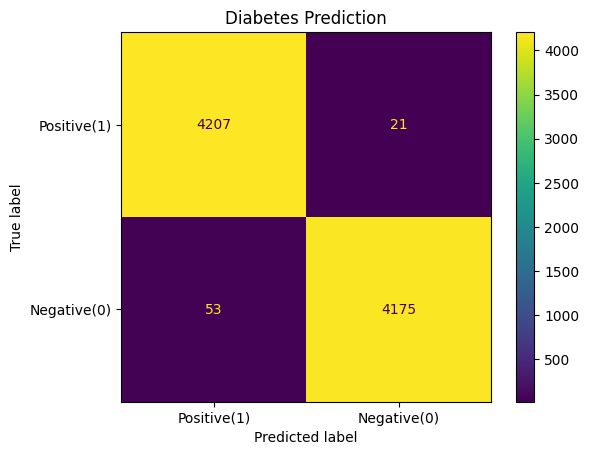

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,SVM,0.995033,0.987465,0.991249,0.999679,0.991282


In [511]:
# cllaing the evalution metrics to check the performance on the train data
df_train_svm_tuning = models_metrics("SVM",y_train_pred_svm_final.Diabetic, y_train_pred_svm_final.predicted, y_train_pred_svm_final.Diabetic_Prob)
df_train_svm_tuning

## Finding the optimal cutoff

In [512]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_svm_final[i]= y_train_pred_svm_final.Diabetic_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_svm_final.head()

,Diabetic,Diabetic_Prob,Patient_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,3.652354e-06,0,0,1,0,0,0,0,0,0,0,0,0
1,0,1.000000e-07,1,0,1,0,0,0,0,0,0,0,0,0
2,0,1.000000e-07,2,0,1,0,0,0,0,0,0,0,0,0
3,0,9.557815e-05,3,0,1,0,0,0,0,0,0,0,0,0
4,0,4.196046e-07,4,0,1,0,0,0,0,0,0,0,0,0


In [513]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_svm_final.Diabetic, y_train_pred_svm_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.983680  1.000000  0.967360
0.2   0.2  0.988174  0.999527  0.976821
0.3   0.3  0.989475  0.998344  0.980605
0.4   0.4  0.990539  0.997398  0.983680
0.5   0.5  0.991249  0.995033  0.987465
0.6   0.6  0.991012  0.991958  0.990066
0.7   0.7  0.989593  0.987465  0.991722
0.8   0.8  0.986637  0.979186  0.994087
0.9   0.9  0.982971  0.968307  0.997635


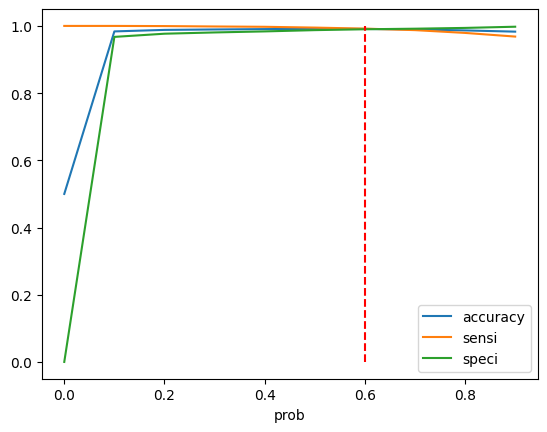

In [514]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.6, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

 From the curve above, 0.6 is the optimum point, since we are interested mostly on Sensitivity hence taking cutoff as 0.3

In [515]:
# deciding final cutoff point based on the bussiness requirement and prediction by the model
y_train_pred_svm_final['final_predicted'] = y_train_pred_svm_final.Diabetic_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_svm_final.head()

,Diabetic,Diabetic_Prob,Patient_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,3.652354e-06,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1.000000e-07,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1.000000e-07,2,0,1,0,0,0,0,0,0,0,0,0,0
3,0,9.557815e-05,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,4.196046e-07,4,0,1,0,0,0,0,0,0,0,0,0,0


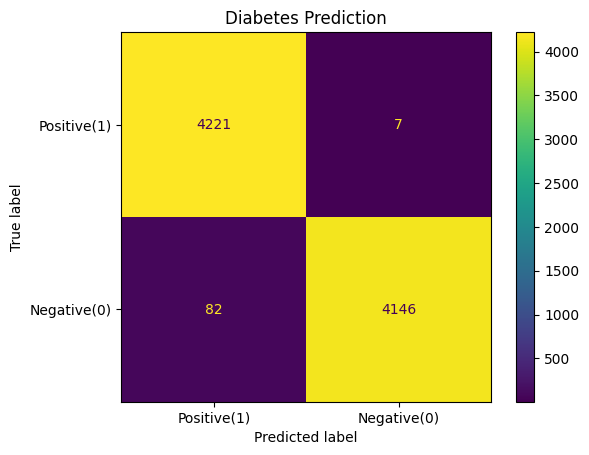

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,SVM,0.998344,0.980605,0.989475,0.999679,0.989567


In [516]:
#performance on the train data
df_train_svm_tuning = models_metrics("SVM",y_train_pred_svm_final.Diabetic,y_train_pred_svm_final.final_predicted,y_train_pred_svm_final.Diabetic_Prob)
df_train_svm_tuning

### Prediction on Test Data

In [517]:
# predicts the Diabetic probability for train data
y_test_pred_svm_prob = svc_final.predict_proba(X_test_svm)[:,1]

y_test_pred_svm_final = pd.DataFrame({'Diabetic':y_test_svm.values, 'Diabetic_Prob':y_test_pred_svm_prob})
y_test_pred_svm_final['Patient_ID'] = y_test_svm.index
y_test_pred_svm_final.head()

,Diabetic,Diabetic_Prob,Patient_ID
0,0,1.000000e-07,3804
1,0,1.000000e-07,2160
2,0,1.000000e-07,290
3,0,1.718736e-01,3488
4,0,1.000000e-07,865


In [518]:
# earlier decided final cutoff point and predictions by the model on the test data
y_test_pred_svm_final['final_predicted'] = y_test_pred_svm_final.Diabetic_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_test_pred_svm_final.head()

,Diabetic,Diabetic_Prob,Patient_ID,final_predicted
0,0,1.000000e-07,3804,0
1,0,1.000000e-07,2160,0
2,0,1.000000e-07,290,0
3,0,1.718736e-01,3488,0
4,0,1.000000e-07,865,0


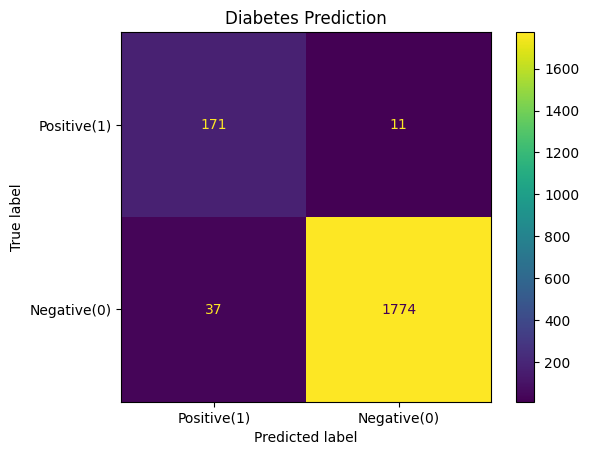

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,SVM,0.93956,0.979569,0.975916,0.995871,0.876923


In [519]:
# performance of the model on the test data
df_test_svm_tuning = models_metrics("SVM",y_test_pred_svm_final.Diabetic, y_test_pred_svm_final.final_predicted, y_test_pred_svm_final.Diabetic_Prob)
df_test_svm_tuning

# **Models Report**

In [520]:
merged_df = pd.concat([df_test_logistic_regressioncv, df_naive, df_knn, df_decision,df_test_random_forest ,df_test_svm_tuning])
merged_df.reset_index().drop(columns='index')

,Model,Sensitivity,Specificity,Accuracy,AUC Score,F1-Score
0,Logistic RegressionCV,0.989011,0.993374,0.992975,0.999117,0.962567
1,Naive Bayes,0.741758,0.899503,0.885098,0.877486,0.541082
2,KNN,0.736264,0.975152,0.953337,0.901730,0.742382
3,Decision Tree,0.818681,0.955826,0.943302,0.887253,0.725061
4,Random Forest,0.813187,0.973495,0.958856,0.983553,0.783069
5,SVM,0.939560,0.979569,0.975916,0.995871,0.876923
